In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [146]:
adv = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/Advertising.csv')
scaler = StandardScaler()

train, test = train_test_split(adv, test_size=0.2, random_state=100)

train_x = train[['TV']]
train_y = train['sales']

In [150]:
scaler.fit(train_x)
train_x_scaled = pd.DataFrame(scaler.transform(train_x),
                              columns=train_x.columns,
                             index= train_x.index)

In [148]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_x_scaled, train_y)
print(model.coef_, model.intercept_)

[4.18753862] 13.798750000000002


In [149]:
m_old = 1000
c_old = 1000
m_values = []
c_values = []
error_values = []
N = train_x_scaled.shape[0]
alpha = 0.1
for i in range(1000):
    # Updatate m
    sum_part = (2/N) * ((-1 * train_x_scaled['TV'] * train_y) + \
    (m_old * np.square(train_x_scaled['TV'])) + \
                        (c_old * train_x_scaled['TV'])).sum()
    m_new = m_old - (alpha * sum_part)
    # Update c
    sum_part = (2/N) * (m_old * train_x_scaled['TV'] + \
                        c_old - train_y).sum()
    c_new = c_old - (alpha * sum_part)
    error = (1/N) * np.square(train_y - m_old*train_x_scaled['TV'] \
                              - c_old).sum()
    error_values.append(error)
    m_values.append(m_old)
    c_values.append(c_old)
    m_old = m_new
    c_old = c_new
m_new, c_new

(4.187538615177148, 13.798750000000004)

In [ ]:
train_x_scaled

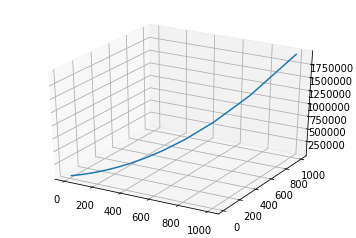

In [103]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(m_values, c_values, error_values)

# PCA

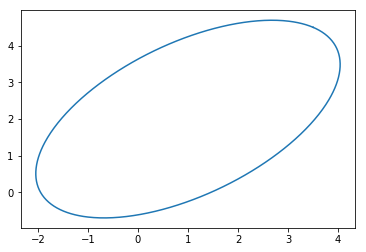

In [154]:
url = 'https://raw.githubusercontent.com/skathirmani/datasets/master/ellipse.csv'
data = pd.read_csv(url)
plt.plot(data['x'], data['y'])

In [213]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pcs = pd.DataFrame(pca.transform(data_scaled),
                   columns=['PC1', 'PC2'])
pcs.shape, data.shape

((629, 2), (629, 2))

1. Data dimension == PCs dimension
2. No meaning to PCs. It is just numbers. Basically no unit
3. PCs variances = eigen values of corr(data)
4. Correlation between PCs will always be zero

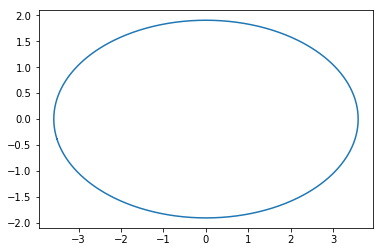

In [181]:
plt.plot(pcs['PC1'], pcs['PC2'])

In [182]:
pcs.corr()

,PC1,PC2
PC1,1.000000e+00,-1.271442e-16
PC2,-1.271442e-16,1.000000e+00


In [169]:
pcs.var()

PC1    1.541904
PC2    0.461281
dtype: float64

In [171]:
np.linalg.eig(pd.DataFrame(data_scaled).corr())

(array([1.552432, 0.447568]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [218]:
pcs['PC2'] = 0

In [214]:
evalues, evectors = np.linalg.eig(pd.DataFrame(data_scaled).corr())

In [200]:
data.shape

(629, 2)

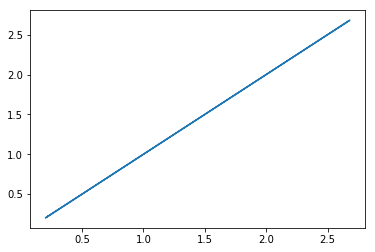

In [221]:
data_rec = pd.DataFrame(np.dot(pcs, np.transpose(evectors)),
                        columns=data.columns)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
#plt.plot(data_scaled['x'], data_scaled['y'])
plt.plot(data_rec['x'], data_rec['y'])

In [226]:
from sklearn.datasets import fetch_olivetti_faces
data = pd.DataFrame(fetch_olivetti_faces()['data'])

In [238]:
data.shape

(400, 4096)

In [229]:
np.sqrt(4096)

64.0

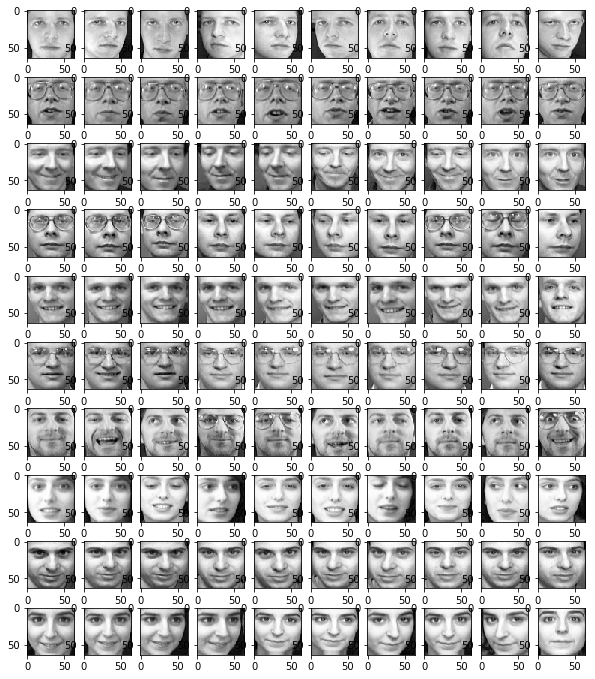

In [261]:
plt.figure(figsize=(10, 12))
for i in range(100):
    image = np.array(data.iloc[i]).reshape(64,64)
    ax = plt.subplot(10, 10, i+1)
    ax.imshow(image, cmap='gray')

In [264]:
data

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.665289,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.074380,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.652893,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.190083,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554
5,0.549587,0.545455,0.541322,0.537190,0.537190,0.533058,0.528926,0.533058,0.590909,0.611570,...,0.623967,0.619835,0.623967,0.615702,0.661157,0.661157,0.690083,0.714876,0.706612,0.702479
6,0.330579,0.305785,0.330579,0.351240,0.425620,0.500000,0.603306,0.632231,0.644628,0.644628,...,0.516529,0.541322,0.541322,0.524793,0.537190,0.487603,0.190083,0.144628,0.152893,0.152893
7,0.128099,0.185950,0.247934,0.314050,0.388430,0.462810,0.520661,0.557851,0.590909,0.623967,...,0.289256,0.157025,0.165289,0.148760,0.157025,0.157025,0.152893,0.152893,0.173554,0.173554
8,0.243802,0.297521,0.367769,0.454545,0.495868,0.537190,0.578512,0.603306,0.611570,0.632231,...,0.702479,0.669421,0.537190,0.235537,0.169421,0.177686,0.190083,0.190083,0.181818,0.190083
9,0.380165,0.442149,0.483471,0.545455,0.582645,0.628099,0.648760,0.677686,0.690083,0.710744,...,0.132231,0.157025,0.165289,0.148760,0.165289,0.173554,0.173554,0.173554,0.173554,0.173554
